## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas

In [12]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import pandas as pd

In [14]:
# Reading Excel File
car = pd.read_csv("CarPrice_Assignment.csv")

In [15]:
# Check the head of the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Inspect the various aspects of the car dataframe

In [16]:
car.shape

(205, 26)

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [18]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning

In [19]:
#Get company name from CarName column
car["CmpnyName"] = car['CarName'].apply(lambda x : x.split(' ')[0])
#Remove unnecessary columns
car.drop(['CarName'],axis=1,inplace=True)
car.drop(['car_ID'],axis=1,inplace=True)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CmpnyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [20]:
# Fixing invalid (spelling errors) in CmpnyName Column
car.CmpnyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [21]:
# maxda to be changed to mazda
#Nissan to be changed to nissan
#porcshce to be changed to porsche
#toyouta to be changed to toyota
#vokswagen,vw to be replaced to volkswagen

def cmpny_replace_name(a,b):
    car.CmpnyName.replace(a,b,inplace=True)

cmpny_replace_name('maxda','mazda')
cmpny_replace_name('Nissan','nissan')
cmpny_replace_name('porcshce','porsche')
cmpny_replace_name('toyouta','toyota')
cmpny_replace_name('vokswagen','volkswagen')
cmpny_replace_name('vw','volkswagen')

car.CmpnyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [22]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CmpnyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [23]:
##drivewheel has spelling mistake. 4wd should be fwd
car.drivewheel.replace('4wd','fwd',inplace=True)

In [24]:
car.drivewheel.unique()

array(['rwd', 'fwd'], dtype=object)

In [25]:
#Checking for duplicates
car.loc[car.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CmpnyName


# Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

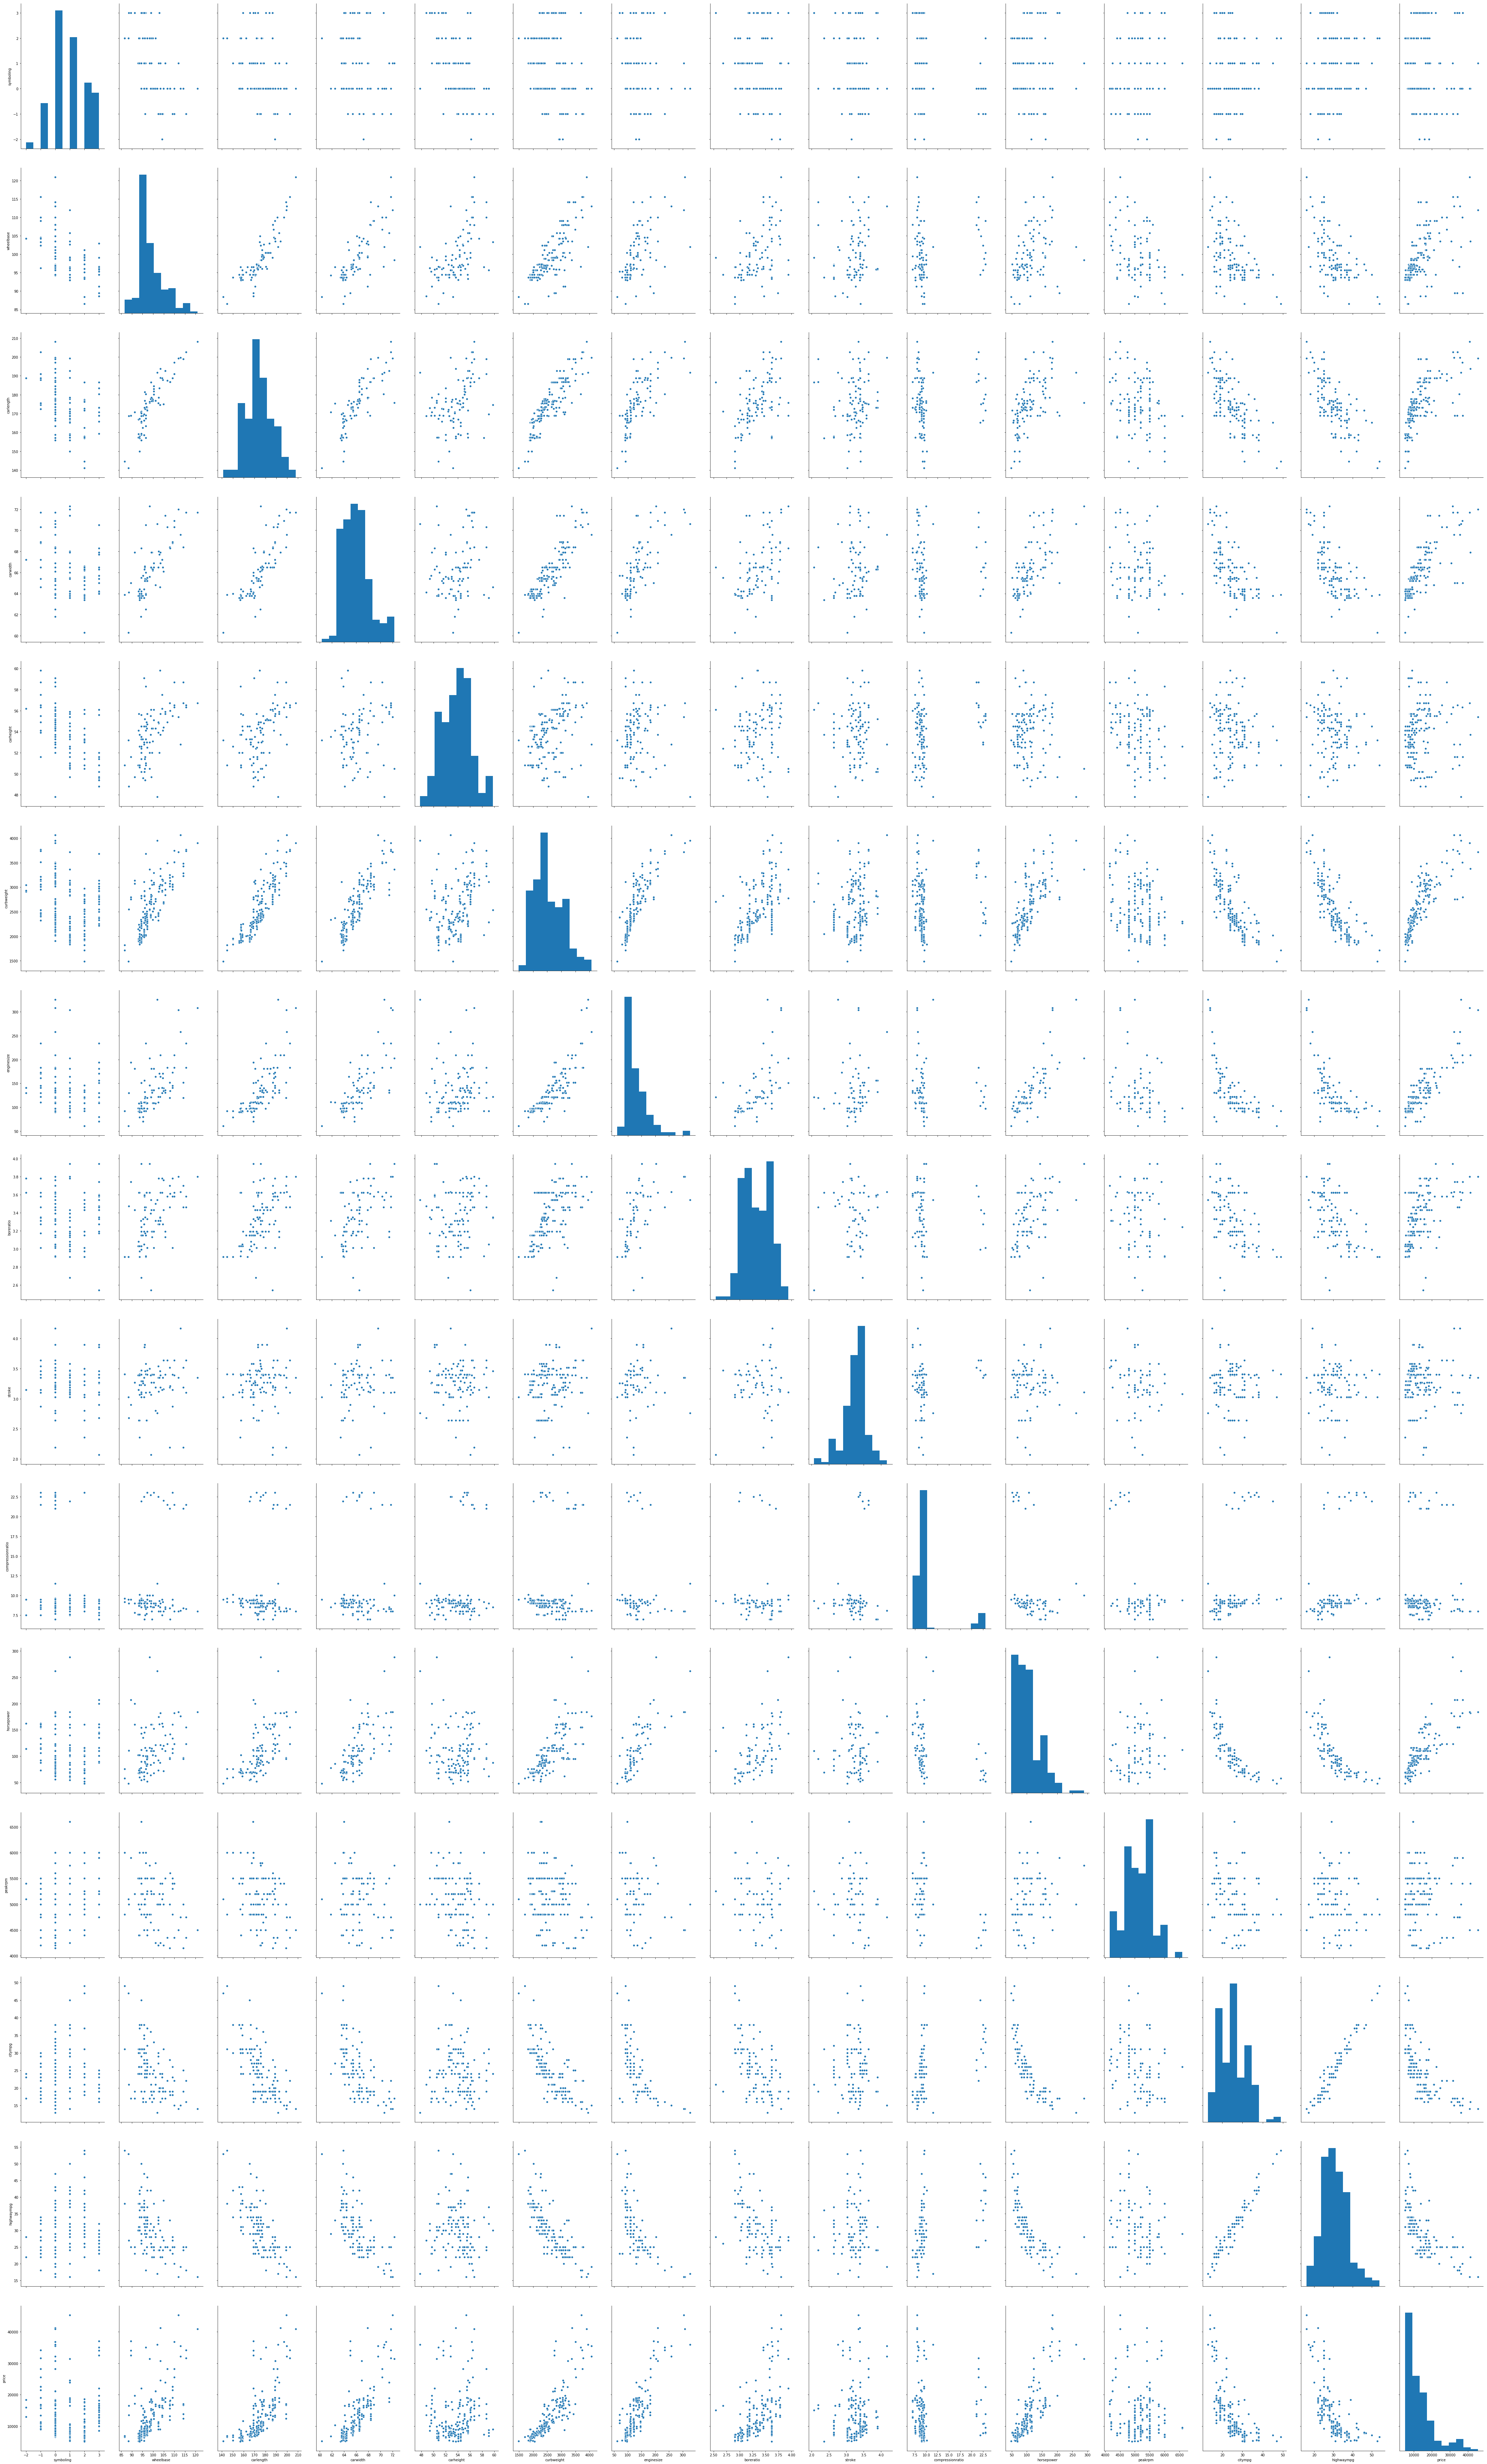

In [28]:
g = sns.pairplot(car)
g.fig.set_size_inches(60,100)
plt.show()

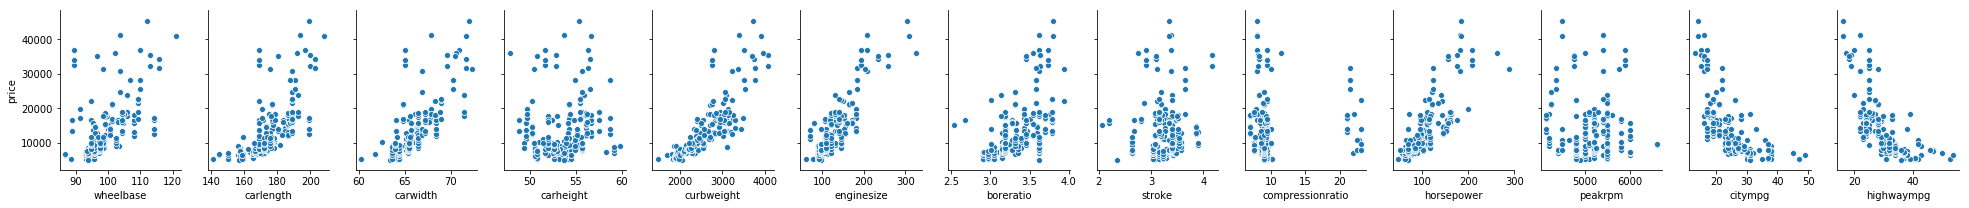

In [30]:
## pair plot on numberical data
num_var = ['wheelbase','carlength','carwidth', 'carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
sns.pairplot(car, x_vars=num_var, y_vars='price',height=3, aspect=0.7, kind='scatter')

# Heat map to see correlation

As you might have noticed, there are a few categorical variables as well. Let's make a heat map and boxplot for some of these variables.

In [31]:
car.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


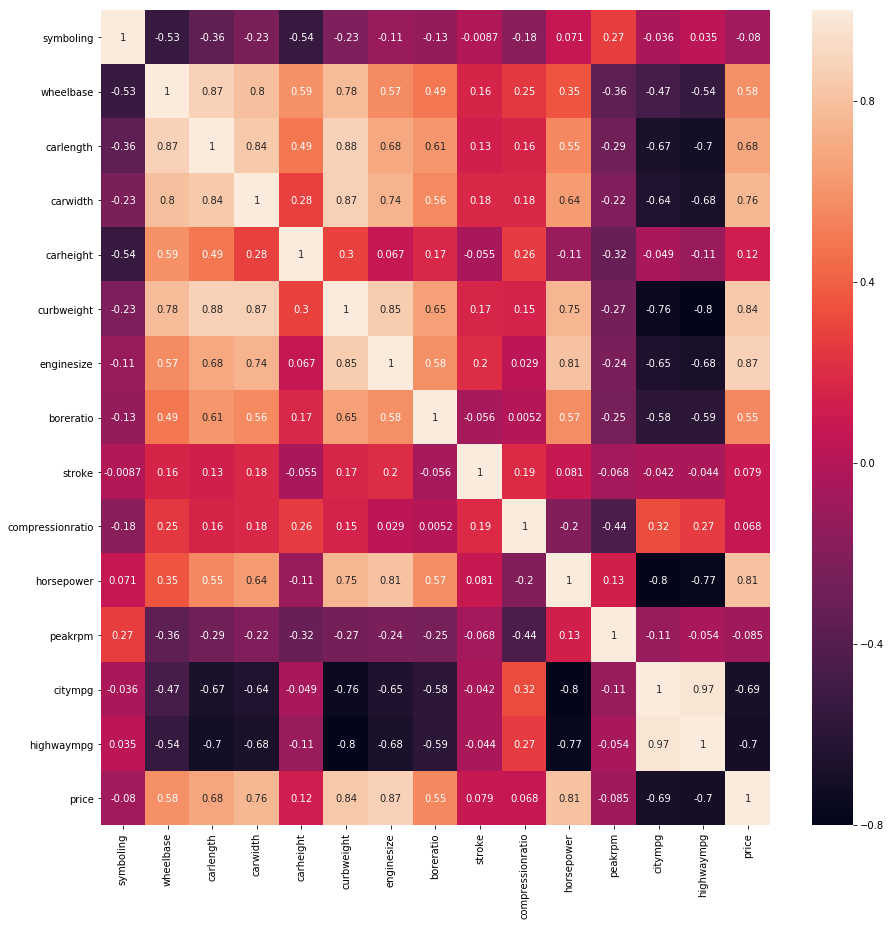

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(car.corr(),annot = True)

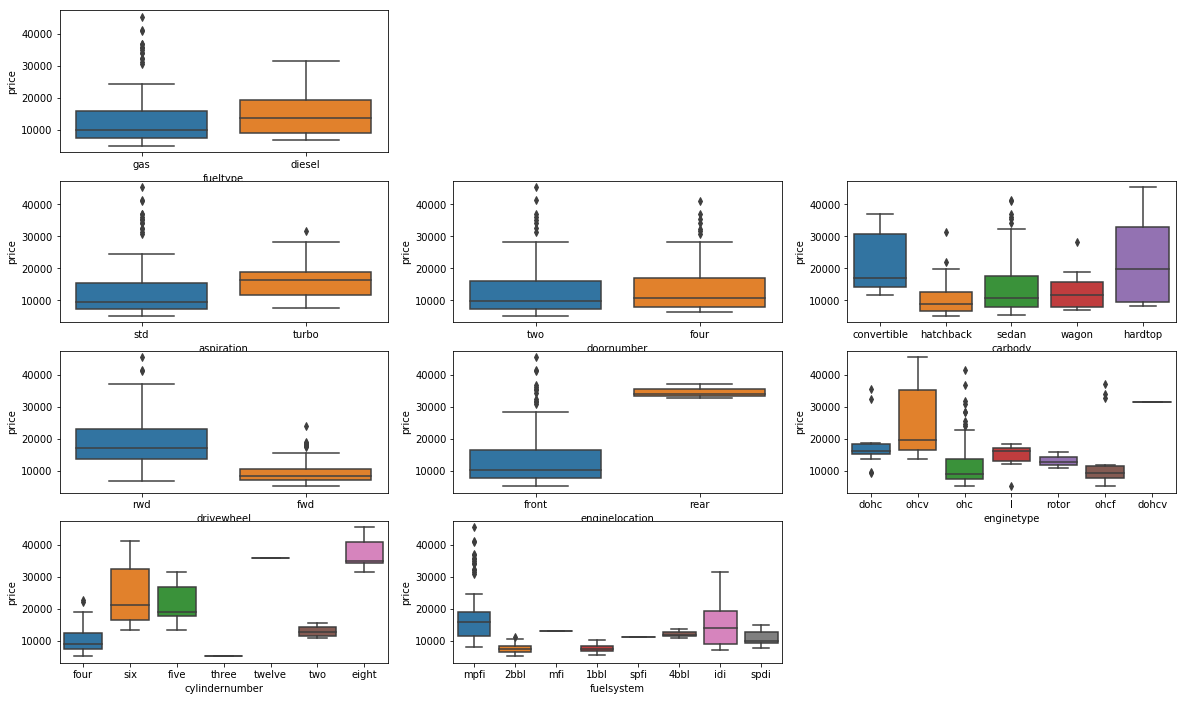

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
#sns.boxplot(x = 'Symboling', y = 'price', data = car)
#plt.subplot(4,3,2)
#sns.boxplot(x = 'carCompany', y = 'price', data = car)
#plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(4,3,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()

## Step 3: Data Preparation

In [34]:
def DispCatgorlVal(colName):
    print('%s values :-' % colName)
    print(car[colName].unique())
    print('\n')
    
catg_var = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CmpnyName']

[ DispCatgorlVal(item) for item in catg_var]

symboling values :-
[ 3  1  2  0 -1 -2]


fueltype values :-
['gas' 'diesel']


aspiration values :-
['std' 'turbo']


doornumber values :-
['two' 'four']


carbody values :-
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


drivewheel values :-
['rwd' 'fwd']


enginelocation values :-
['front' 'rear']


enginetype values :-
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


cylindernumber values :-
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


fuelsystem values :-
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


CmpnyName values :-
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']




[None, None, None, None, None, None, None, None, None, None, None]

# Creating Dummy variables to Categorical variables

In [35]:
# Got issue while creating dummies - Throwing error that symboling is int64 - change it to categorical dtype
car.symboling = pd.Categorical(car.symboling)

In [36]:
# Getting Dummy variables of all catergorical values
car_dumcatg_df = pd.get_dummies(car.loc[:,catg_var], prefix=catg_var, drop_first=True)
car_dumcatg_df.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,CmpnyName_nissan,CmpnyName_peugeot,CmpnyName_plymouth,CmpnyName_porsche,CmpnyName_renault,CmpnyName_saab,CmpnyName_subaru,CmpnyName_toyota,CmpnyName_volkswagen,CmpnyName_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Check what the dataset 'dumcatg' looks like
car_dumcatg_df.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,CmpnyName_nissan,CmpnyName_peugeot,CmpnyName_plymouth,CmpnyName_porsche,CmpnyName_renault,CmpnyName_saab,CmpnyName_subaru,CmpnyName_toyota,CmpnyName_volkswagen,CmpnyName_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
## Creating new master df to merge the dummy and numerical variables of car df
carmstr_df = pd.concat([car.loc[:, num_var], car_dumcatg_df, car.loc[:, 'price']],axis=1)
carmstr_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CmpnyName_peugeot,CmpnyName_plymouth,CmpnyName_porsche,CmpnyName_renault,CmpnyName_saab,CmpnyName_subaru,CmpnyName_toyota,CmpnyName_volkswagen,CmpnyName_volvo,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,17450.0


In [39]:
carmstr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
symboling_-1             205 non-null uint8
symboling_0              205 non-null uint8
symboling_1              205 non-null uint8
symboling_2              205 non-null uint8
symboling_3              205 non-null uint8
fueltype_gas             205 non-null uint8
aspiration_turbo         205 non-null uint8
d

In [40]:
carmstr_df.shape

(205, 68)

# Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [108]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(carmstr_df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features
We will use MinMax scaling.

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [110]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase','carlength','carwidth', 'carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

C:\Users\dayan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CmpnyName_peugeot,CmpnyName_plymouth,CmpnyName_porsche,CmpnyName_renault,CmpnyName_saab,CmpnyName_subaru,CmpnyName_toyota,CmpnyName_volkswagen,CmpnyName_volvo,price
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,1,0,0,0,0,0,0,0,0.068818
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,1,0,0,0,0,0,0,0.466890
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,1,0,0,0.122110
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,0.314446
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,0,1,0.382131


# Dividing into X and Y sets for the model building

In [111]:
y_train = df_train.pop('price')
X_train = df_train

In [112]:
y_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
190    0.134321
96     0.065779
177    0.169351
181    0.293726
97     0.079592
120    0.030693
117    0.360030
57     0.235572
44     0.104940
153    0.049728
85     0.051689
127    0.798685
151    0.033704
204    0.483659
10     0.312512
20     0.040252
170    0.167997
82     0.207503
12     0.437937
16     1.000000
178    0.316048
90     0.054728
89     0.010526
45     0.104940
161    0.089510
         ...   
129    0.726096
159    0.073763
132    0.185982
108    0.223278
155    0.101113
130    0.115396
86     0.084841
93     0.061635
137    0.373014
144    0.113683
58     0.290825
60     0.093295
107    0.187364
143    0.133768
203    0.479377
34     0.055557
14     0.537254
66     0.365389
53     0.043567
98     0.086499
180    0.292068
94     0.060254
138    0.000000
176    0.159682
79     0.071028
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143

# Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [113]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [114]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [115]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 14),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 24),
 ('highwaympg', False, 15),
 ('symboling_-1', False, 26),
 ('symboling_0', False, 36),
 ('symboling_1', False, 38),
 ('symboling_2', False, 37),
 ('symboling_3', False, 39),
 ('fueltype_gas', False, 13),
 ('aspiration_turbo', False, 2),
 ('doornumber_two', False, 41),
 ('carbody_hardtop', False, 20),
 ('carbody_hatchback', False, 19),
 ('carbody_sedan', False, 21),
 ('carbody_wagon', False, 22),
 ('drivewheel_rwd', False, 28),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 43),
 ('enginetype_ohcf', False, 11),
 ('enginetype_ohcv', False, 35),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),


In [116]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'CmpnyName_bmw', 'CmpnyName_mitsubishi',
       'CmpnyName_peugeot', 'CmpnyName_porsche'],
      dtype='object')

In [117]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'citympg',
       'highwaympg', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CmpnyName_audi', 'CmpnyName_buick',
       'CmpnyName_chevrolet', 'CmpnyName_dodge', 'CmpnyName_honda',
       'CmpnyName_isuzu', 'CmpnyName_jaguar', 'CmpnyName_mazda',
       'CmpnyName_mercury', 'CmpnyName_nissan', 'CmpnyName_plymouth',
       'CmpnyName_renault', 'CmpnyName_saab', 'CmpnyName_subaru',
       'CmpnyName_toyota', 'CmpnyName_volkswagen', 'CmpnyName_volvo'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [118]:
# UDF to get the linear model summary of the selected variables
#  col: takes list/array of column name
def getSummary(input_data):
    # Creating X_train_rfe dataframe with selected variables
    X_train_rfe = input_data
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    print(lm.summary())
    return lm

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(input_data):
    vif = pd.DataFrame()
#X = X_train_new
    vif['Features'] = input_data.columns
    vif['VIF'] = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [121]:
# UDF to get the VIF of selected variables
#  colmns: takes list/array of column name
def getVIF(colmns):
    colmns.append('price')
    return vif_cal(input_data=carprice_master.loc[:,colmns], dependent_col="price")

In [122]:
# UDF to get the list of selected list of columns after droping columns
#  col: Series of column names
#  drop_cols: columns to drop
def getColumnList(col, drop_cols=[]):
    colmns = col.drop(labels=drop_cols)
    colmns = colmns.tolist()
    return colmns

# Training the model for the first time with all columns

In [123]:
lr_model = getSummary(X_train)
vif_cal(X_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     54.82
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.36e-47
Time:                        18:24:39   Log-Likelihood:                 282.66
No. Observations:                 143   AIC:                            -443.3
Df Residuals:                      82   BIC:                            -262.6
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

,Features,VIF
32,enginetype_rotor,inf
36,cylindernumber_three,inf
26,enginelocation_rear,inf
63,CmpnyName_subaru,inf
30,enginetype_ohcf,inf
38,cylindernumber_two,inf
28,enginetype_l,inf
58,CmpnyName_peugeot,inf
18,fueltype_gas,3100.65
41,fuelsystem_idi,800.10


In [126]:
# Creating X_test dataframe with RFE selected 20 variables
X_train_nrfe = X_train[col]
X_train_nrfe = sm.add_constant(X_train_nrfe)
lm = sm.OLS(y_train,X_train_nrfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.74e-69
Time:                        18:26:15   Log-Likelihood:                 224.63
No. Observations:                 143   AIC:                            -411.3
Df Residuals:                     124   BIC:                            -355.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.33

In [128]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_nrfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,enginetype_l,inf
11,enginetype_rotor,inf
19,CmpnyName_peugeot,inf
16,cylindernumber_two,inf
14,cylindernumber_three,inf
0,const,82.43
3,enginesize,28.02
13,cylindernumber_four,15.82
2,curbweight,13.08
6,horsepower,9.69


# enginetype_dohcv is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [129]:
X_train_new = X_train_nrfe.drop(["enginetype_dohcv"], axis = 1)

In [130]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.29e-70
Time:                        18:28:08   Log-Likelihood:                 224.62
No. Observations:                 143   AIC:                            -413.2
Df Residuals:                     125   BIC:                            -359.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.33

,Features,VIF
10,enginetype_rotor,inf
9,enginetype_l,inf
18,CmpnyName_peugeot,inf
15,cylindernumber_two,inf
13,cylindernumber_three,inf
0,const,81.85
3,enginesize,27.74
12,cylindernumber_four,15.80
2,curbweight,12.62
6,horsepower,8.49


# 
# peakrpm is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [131]:
X_train_new = X_train_new.drop(["peakrpm"], axis = 1)

In [132]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.41e-71
Time:                        18:28:19   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.32

,Features,VIF
9,enginetype_rotor,inf
8,enginetype_l,inf
17,CmpnyName_peugeot,inf
14,cylindernumber_two,inf
12,cylindernumber_three,inf
0,const,74.82
3,enginesize,27.58
11,cylindernumber_four,15.39
2,curbweight,12.19
1,carwidth,6.06


# horsepower is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [133]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)

In [134]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.89e-71
Time:                        18:28:28   Log-Likelihood:                 221.13
No. Observations:                 143   AIC:                            -410.3
Df Residuals:                     127   BIC:                            -362.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.29

,Features,VIF
16,CmpnyName_peugeot,inf
13,cylindernumber_two,inf
7,enginetype_l,inf
8,enginetype_rotor,inf
11,cylindernumber_three,inf
0,const,66.92
3,enginesize,27.48
10,cylindernumber_four,13.40
2,curbweight,11.40
1,carwidth,6.06


# CmpnyName_mitsubishi is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [135]:
X_train_new = X_train_new.drop(["CmpnyName_mitsubishi"], axis = 1)

In [136]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.03e-70
Time:                        18:28:39   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

,Features,VIF
8,enginetype_rotor,inf
7,enginetype_l,inf
15,CmpnyName_peugeot,inf
13,cylindernumber_two,inf
11,cylindernumber_three,inf
0,const,65.22
3,enginesize,27.43
10,cylindernumber_four,13.23
2,curbweight,11.40
1,carwidth,6.06


# Now p values are <0.05 hence now check the VIF for he variables
##engine_l is insignificant in presence of other variables as vif is high, dropping it and rebuilt model with out that

In [137]:
X_train_new = X_train_new.drop(['enginetype_l'], axis=1)

In [138]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.03e-70
Time:                        18:28:47   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

,Features,VIF
7,enginetype_rotor,inf
12,cylindernumber_two,inf
0,const,65.22
3,enginesize,27.43
9,cylindernumber_four,13.23
2,curbweight,11.40
1,carwidth,6.06
4,boreratio,5.63
11,cylindernumber_twelve,3.05
8,cylindernumber_five,2.91


# Now p values are <0.05 hence now check the VIF for he variables, enginetype_rotor is insignificant in presence of other variables as vif is high, dropping it and rebuilt model with out that

In [139]:
X_train_new = X_train_new.drop(['enginetype_rotor'], axis=1)

In [140]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.03e-70
Time:                        18:28:56   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

,Features,VIF
0,const,65.22
3,enginesize,27.43
8,cylindernumber_four,13.23
2,curbweight,11.40
1,carwidth,6.06
4,boreratio,5.63
11,cylindernumber_two,5.46
10,cylindernumber_twelve,3.05
7,cylindernumber_five,2.91
5,stroke,2.46


# Now p values are <0.05 hence now check the VIF for he variables, enginesize is insignificant in presence of other variables as vif is high, dropping it and rebuilt model with out that

In [141]:
X_train_new = X_train_new.drop(['enginesize'], axis=1)

In [142]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.01e-61
Time:                        18:29:09   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

,Features,VIF
0,const,55.57
2,curbweight,9.11
1,carwidth,6.03
7,cylindernumber_four,5.50
3,boreratio,3.33
13,CmpnyName_porsche,1.89
5,enginelocation_rear,1.74
10,cylindernumber_two,1.65
6,cylindernumber_five,1.64
12,CmpnyName_peugeot,1.64


# cylindernumber_four is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [143]:
X_train_new = X_train_new.drop(['cylindernumber_four'], axis=1)

In [144]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.72e-62
Time:                        18:29:17   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

,Features,VIF
0,const,26.32
1,carwidth,5.89
2,curbweight,5.61
3,boreratio,2.31
12,CmpnyName_porsche,1.85
5,enginelocation_rear,1.64
6,cylindernumber_five,1.42
4,stroke,1.34
11,CmpnyName_peugeot,1.23
8,cylindernumber_twelve,1.17


# cylindernumber_five is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [145]:
X_train_new = X_train_new.drop(['cylindernumber_five'], axis=1)

In [146]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.37e-63
Time:                        18:29:53   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

,Features,VIF
0,const,25.76
2,curbweight,5.59
1,carwidth,4.99
3,boreratio,2.19
11,CmpnyName_porsche,1.81
5,enginelocation_rear,1.62
4,stroke,1.34
10,CmpnyName_peugeot,1.18
7,cylindernumber_twelve,1.14
9,CmpnyName_bmw,1.08


# stroke is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [147]:
X_train_new = X_train_new.drop(['stroke'], axis=1)

In [148]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.72e-64
Time:                        18:30:08   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

,Features,VIF
0,const,11.73
2,curbweight,5.41
1,carwidth,4.91
3,boreratio,1.89
10,CmpnyName_porsche,1.81
4,enginelocation_rear,1.62
9,CmpnyName_peugeot,1.17
6,cylindernumber_twelve,1.07
8,CmpnyName_bmw,1.07
5,cylindernumber_three,1.06


# Cylinder_two is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [149]:
X_train_new = X_train_new.drop(['cylindernumber_two'], axis=1)

In [150]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.09e-64
Time:                        18:30:17   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

,Features,VIF
0,const,11.73
2,curbweight,5.38
1,carwidth,4.89
3,boreratio,1.88
9,CmpnyName_porsche,1.80
4,enginelocation_rear,1.62
8,CmpnyName_peugeot,1.16
6,cylindernumber_twelve,1.07
7,CmpnyName_bmw,1.07
5,cylindernumber_three,1.06


# Cylinder_two is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [151]:

X_train_new = X_train_new.drop(['boreratio'], axis=1)

In [152]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.17e-65
Time:                        18:30:38   Log-Likelihood:                 185.90
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     134   BIC:                            -327.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.20

,Features,VIF
0,const,8.90
1,carwidth,4.89
2,curbweight,4.86
8,CmpnyName_porsche,1.67
3,enginelocation_rear,1.62
7,CmpnyName_peugeot,1.14
5,cylindernumber_twelve,1.07
6,CmpnyName_bmw,1.07
4,cylindernumber_three,1.05


# Cylinder_twelve is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [153]:
X_train_new = X_train_new.drop(['cylindernumber_twelve'], axis=1)

In [154]:
lr_model = getSummary(X_train_new)
vif_cal(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     176.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.01e-64
Time:                        18:30:52   Log-Likelihood:                 182.71
No. Observations:                 143   AIC:                            -349.4
Df Residuals:                     135   BIC:                            -325.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2080 

,Features,VIF
0,const,8.74
1,carwidth,4.89
2,curbweight,4.77
7,CmpnyName_porsche,1.66
3,enginelocation_rear,1.62
6,CmpnyName_peugeot,1.13
5,CmpnyName_bmw,1.06
4,cylindernumber_three,1.05


# Cmpny_name_posche is insignificant in presence of other variables as pvalue is high, dropping it and rebuilt model with out that

In [155]:
X_train_new = X_train_new.drop(['CmpnyName_porsche'], axis=1)

In [159]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     198.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.10e-64
Time:                        18:42:03   Log-Likelihood:                 179.77
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     136   BIC:                            -324.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2176 

In [160]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.26
2,curbweight,4.61
1,carwidth,4.48
6,CmpnyName_peugeot,1.12
5,CmpnyName_bmw,1.06
4,cylindernumber_three,1.05
3,enginelocation_rear,1.02


# Residual Analysis of the train data¶
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [161]:
y_train_price = lm.predict(X_train_new)

In [162]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

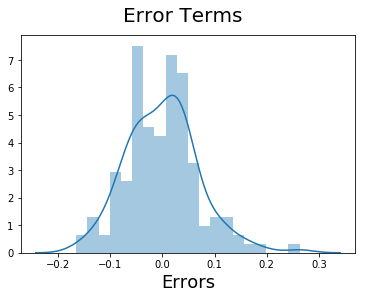

In [163]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [165]:
# Making Predictions on test set
#Min Max scalar transform on test data set
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [166]:
# Divide X test n Y Test

y_test = df_test.pop('price')
X_test = df_test


In [167]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_x4 = X_train_new.drop(['const'],axis =1)
X_test_new = X_test[X_train_x4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [168]:
print(X_train_new.columns)

Index(['const', 'carwidth', 'curbweight', 'enginelocation_rear',
       'cylindernumber_three', 'CmpnyName_bmw', 'CmpnyName_peugeot'],
      dtype='object')


In [169]:
# Making predictions on test set
y_pred = lm.predict(X_test_new)

In [175]:
# UDF to evaluate the model
# y_pred: takes the predicted price values
from sklearn import metrics
def evaluateModel(y_pred):
    c = [i for i in range(1,y_pred.size+1,1)] # generating index 
    # Actual versus predict value
    fig = plt.figure()
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") 
    fig.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Car Price', fontsize=16)                           
    
    # Error on each prediction
    fig = plt.figure()
    plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
    fig.suptitle('Error Terms', fontsize=20)             
    plt.xlabel('Index', fontsize=18)                    
    plt.ylabel('ytest-ypred', fontsize=16)               
    
    # y_test vs y_pred
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)               
    plt.xlabel('y_test', fontsize=18)                         
    plt.ylabel('y_pred', fontsize=16)                         
    
    # Distribution of each error
    fig = plt.figure()
    sns.distplot((y_test-y_pred),bins=50)
    fig.suptitle('Error Terms', fontsize=20)                  
    plt.xlabel('y_test-y_pred', fontsize=18)                 
    plt.ylabel('Index', fontsize=16)                          
    

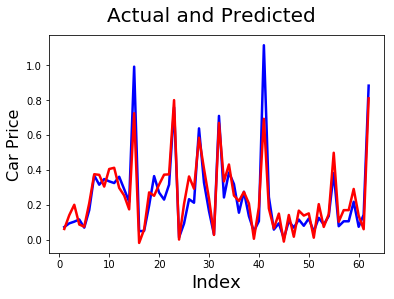

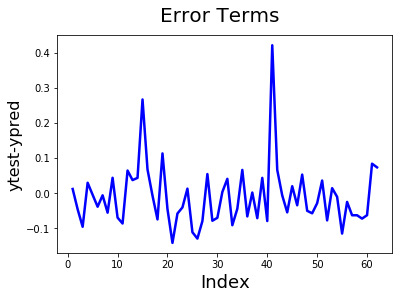

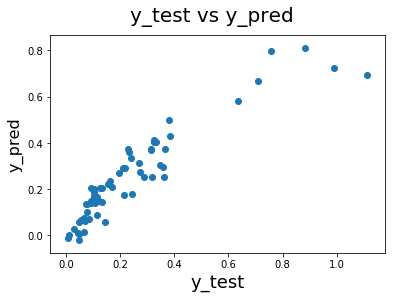

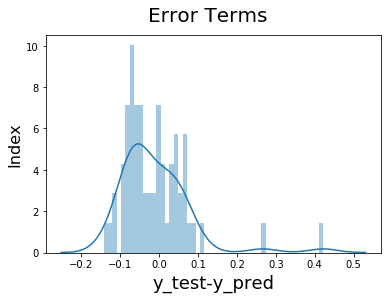

In [176]:
evaluateModel(y_pred)

In [174]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.851237782675478